### Table of contents
# 4. Regression analysis
### 4.1 Import assets
### 4.2 Data cleaning
### 4.3 Data prep for regression analysis
### 4.4 Regression analysis

# 4.1 Import assets

In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
# Path to import datasets
path = r'C:\Users\raque\Documents\Achievement 6\Forbes billionaires 1997-2023 analysis'

In [4]:
# Import datasets
df_billio = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_billionaires_1997_2023_clean.csv'), index_col = False)

# 4.2 Data cleaning

In [5]:
df_billio.columns

Index(['year', 'rank', 'net_worth_billions', 'full_name', 'age', 'gender',
       'country_of_citizenship', 'country_of_residence', 'city_of_residence',
       'business_industries', 'organization_name', 'position_in_organization',
       'self_made', 'wealth_status'],
      dtype='object')

In [6]:
df_billio.shape

(31731, 14)

In [7]:
df_billio.head()

,year,rank,net_worth_billions,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,1,2.0,Chatri Sophonpanich & family,73.0,Male,Thailand,Thailand,Bangkok,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,2,1.8,King Bhumibol Adulyadej,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,1,3.3,Edmond Safra,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,True,NaN
3,1999,1,7.1,Dieter Schwarz,59.0,Male,Germany,Germany,Neckarsulm,['Fashion & Retail'],NaN,NaN,True,NaN
4,1999,2,2.9,Martin Ebner,53.0,Male,Switzerland,Switzerland,Wilen,['Finance and Investments'],NaN,NaN,False,NaN


### Creating subsets

In [8]:
# Filtering year 2023
df_2023 = df_billio.loc[df_billio['year'] == 2023]

In [9]:
# Create a subset for 2023 with the relevant data for the relations analysis
sub_2023 = df_2023[['year', 'rank', 'net_worth_billions', 'age']]

In [10]:
sub_2023.shape

(2640, 4)

In [11]:
sub_2023.head()

,year,rank,net_worth_billions,age
29091,2023,1,211.0,74.0
29092,2023,2,180.0,51.0
29093,2023,3,114.0,59.0
29094,2023,4,107.0,78.0
29095,2023,5,106.0,92.0


In [12]:
# Create a subset for 2023 with the relevant data for the relations analysis
sub_billio = df_billio[['year', 'rank', 'net_worth_billions', 'age']]

In [13]:
sub_billio.shape

(31731, 4)

In [14]:
sub_billio.head()

,year,rank,net_worth_billions,age
0,1997,1,2.0,73.0
1,1997,2,1.8,69.0
2,1998,1,3.3,65.0
3,1999,1,7.1,59.0
4,1999,2,2.9,53.0


### Missing values

In [15]:
# Check for missing values
sub_billio.isnull().sum()

year                    0
rank                    0
net_worth_billions      0
age                   675
dtype: int64

In [16]:
# Impute missing values with median
sub_billio['age'].fillna(sub_billio['age'].median(), inplace=True)

C:\Users\raque\AppData\Local\Temp\ipykernel_28016\1127739938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_billio['age'].fillna(sub_billio['age'].median(), inplace=True)


In [17]:
# Last check for NaN
sub_billio.isnull().sum()

year                  0
rank                  0
net_worth_billions    0
age                   0
dtype: int64

In [18]:
# Check for missing values
sub_2023.isnull().sum()

year                   0
rank                   0
net_worth_billions     0
age                   65
dtype: int64

In [19]:
# Impute missing values with median
sub_2023['age'].fillna(sub_2023['age'].median(), inplace=True)

C:\Users\raque\AppData\Local\Temp\ipykernel_28016\2045718345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_2023['age'].fillna(sub_2023['age'].median(), inplace=True)


In [20]:
# Last check for NaN
sub_2023.isnull().sum()

year                  0
rank                  0
net_worth_billions    0
age                   0
dtype: int64

2% of age missing data has been imputed through median in both subsets

### Duplicates

In [21]:
# Checking for duplicates
dups = sub_billio.duplicated()

In [22]:
dups.shape # no dups

(31731,)

In [23]:
# Checking for duplicates
dups23 = sub_2023.duplicated()

In [24]:
dups23.shape # no dups

(2640,)

### Extreme values check

C:\Users\raque\AppData\Local\Temp\ipykernel_28016\2981144357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sub_2023['net_worth_billions'], bins=50) # Shows extreme values


<Axes: xlabel='net_worth_billions', ylabel='Density'>

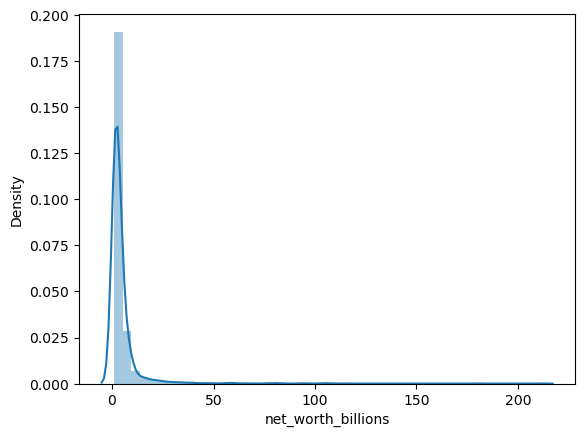

In [25]:
# shows extreme values for 'net_worth_billions'
sns.distplot(sub_2023['net_worth_billions'], bins=50) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [26]:
sub_2023['net_worth_billions'].mean() # Check the mean

4.623787878787878

In [27]:
sub_2023['net_worth_billions'].median() # Check the median

2.3

In [28]:
sub_2023['net_worth_billions'].max() # Check the max

211.0

# 4.3 Data prep for regression analysis

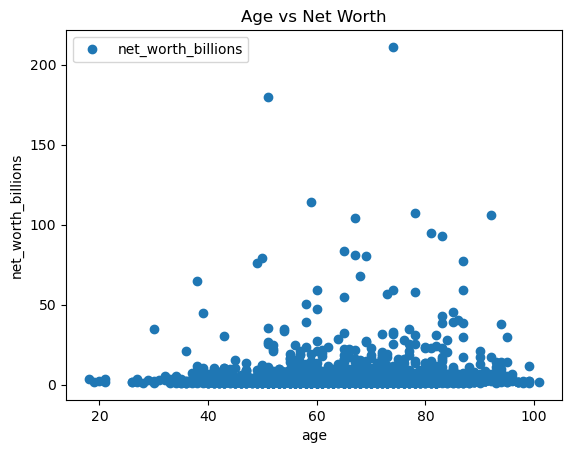

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sub_2023.plot(x = 'age', y='net_worth_billions',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Net Worth')  
plt.xlabel('age')  
plt.ylabel('net_worth_billions')  
plt.show()

#### Hypothesis: The older the person the higher the net worth

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub_2023['age'].values.reshape(-1,1)
y = sub_2023['net_worth_billions'].values.reshape(-1,1)

In [31]:
X

array([[74.],
       [51.],
       [59.],
       ...,
       [60.],
       [71.],
       [66.]])

In [32]:
y

array([[211.],
       [180.],
       [114.],
       ...,
       [  1.],
       [  1.],
       [  1.]])

In [33]:
# Split data into a training set and a test set.
# 0.3 is specifying that the test set should comprise 30 percent of the data (thus making the training set 70 percent of the data).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4.4 Regression analysis

In [34]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

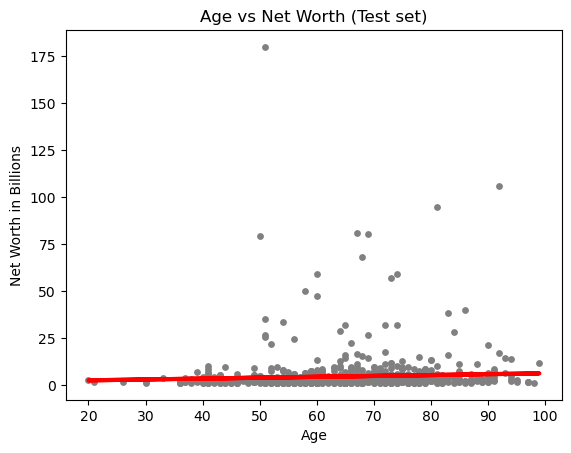

In [37]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Net Worth (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Net Worth in Billions')
plot_test.show()

In [38]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04694998]]
Mean squared error:  125.97498122182316
R2 score:  0.00303642901903034


In [40]:
y_predicted

array([[5.28319191],
       [4.81369212],
       [4.2033424 ],
       [4.90759208],
       [3.3112928 ],
       [4.25029237],
       [4.48504227],
       [4.01554248],
       [5.00149204],
       [3.92164252],
       [4.67284218],
       [3.92164252],
       [4.48504227],
       [3.92164252],
       [4.06249246],
       [5.04844202],
       [4.48504227],
       [4.15639242],
       [5.14234197],
       [4.01554248],
       [4.25029237],
       [3.3112928 ],
       [5.23624193],
       [5.89354164],
       [4.67284218],
       [4.62589221],
       [3.92164252],
       [5.00149204],
       [4.06249246],
       [5.18929195],
       [4.81369212],
       [5.23624193],
       [4.67284218],
       [3.73384261],
       [3.63994265],
       [5.84659166],
       [4.43809229],
       [3.92164252],
       [2.84179301],
       [4.25029237],
       [3.49909271],
       [3.21739284],
       [4.90759208],
       [3.92164252],
       [5.9874416 ],
       [3.35824277],
       [5.095392  ],
       [4.203

In [41]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.3,5.283192
1,2.2,4.813692
2,3.6,4.203342
3,3.1,4.907592
4,2.3,3.311293
5,1.2,4.250292
6,1.3,4.485042
7,4.1,4.015542
8,2.2,5.001492
9,1.4,3.921643


### Comments
The slope is upward but not very steep. The statistics indicate 0.4. Which isn't very strong. 
The MSE is 125 which means the line is fairly close to the observations.
And the R2 is 0.003, which is really close to zero. This sumed up with the table above, confirms the model isn't a good fit at all, and the relationship of variables isn't the best for this. 

### Compare how the regression fits the training set

In [42]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.04694998]]
Mean squared error:  83.52869084454775
R2 score:  0.0044779232215181874


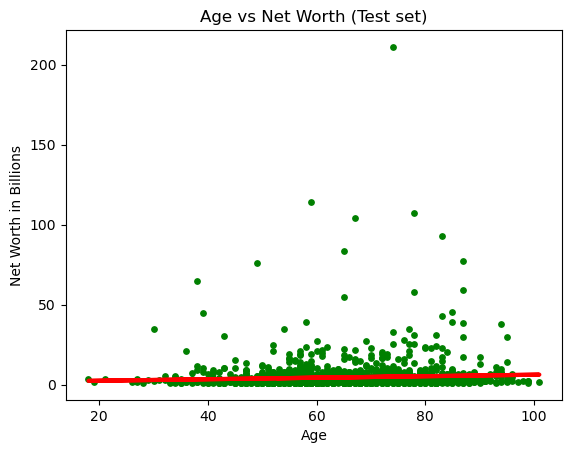

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs Net Worth (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Net Worth in Billions')
plot_test.show()

### Comment
The MSE is lower in the training model but we still have the same values Slope.
R2 is slightly better, meaning the model fits the training set slightly better than the test set. But the difference is really small. The values also confirm that the relationship isn’t purely linear.